In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/used-car-price-dataset-competition-format/X_test.csv
/kaggle/input/used-car-price-dataset-competition-format/y_train.csv
/kaggle/input/used-car-price-dataset-competition-format/X_train.csv
/kaggle/input/used-car-price-dataset-competition-format/test_label/y_test.csv


All models are subject to betterment with more stringent hyper-parameter tuning. This can be achieved by random selection, brute force methods, etc. Various other classifiers can also be used, but the most standard classifiers have been considered in this notebook.

The best score was **92.57%** with the best **MSE being around 4900**

Car brand has been transformed into **ordinal catergorical variable**.

Recommend standard practices for data transformation, outlier detection, and vizualization have been incorporated in this notebook

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso,Ridge,BayesianRidge,ElasticNet,HuberRegressor,LinearRegression,LogisticRegression,SGDRegressor
from sklearn.metrics import mean_squared_error

In [3]:
xtrain = pd.read_csv('../input/used-car-price-dataset-competition-format/X_train.csv')
xtest = pd.read_csv('../input/used-car-price-dataset-competition-format/X_test.csv')
ytrain= pd.read_csv('../input/used-car-price-dataset-competition-format/y_train.csv')
ytest=pd.read_csv('../input/used-car-price-dataset-competition-format/test_label/y_test.csv')

In [4]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)


(4960, 10)
(4960, 2)
(2672, 10)
(2672, 2)


In [5]:
xtest

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,12000,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0
1,12001,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0
2,12004,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0
3,12013,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0
4,12017,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0
...,...,...,...,...,...,...,...,...,...,...
2667,19618,audi,A7,2015,Semi-Auto,21100,Petrol,325.0,29.7,4.0
2668,19620,merc,CLS Class,2015,Automatic,60972,Diesel,160.0,52.3,3.0
2669,19626,ford,Puma,2020,Manual,4111,Petrol,145.0,50.4,1.0
2670,19630,merc,CLA Class,2016,Automatic,25726,Petrol,200.0,41.5,2.0


In [6]:
df = pd.concat([xtrain, ytrain], axis=1)
df.drop(df.columns[-2],axis=1,inplace=True)
df

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145.0,39.8,2.2,31995
1,vauxhall,GTC,2015,Manual,47870,Diesel,125.0,60.1,2.0,7700
2,audi,RS4,2019,Automatic,5151,Petrol,145.0,29.1,2.9,58990
3,vw,Scirocco,2016,Automatic,20423,Diesel,30.0,57.6,2.0,12999
4,skoda,Scala,2020,Semi-Auto,3569,Petrol,145.0,47.1,1.0,16990
...,...,...,...,...,...,...,...,...,...,...
4955,merc,GL Class,2015,Automatic,24314,Diesel,125.0,56.6,2.1,17999
4956,bmw,6 Series,2017,Automatic,18000,Diesel,145.0,51.4,3.0,28900
4957,vw,CC,2015,Manual,84932,Diesel,30.0,60.1,2.0,8998
4958,audi,A7,2017,Semi-Auto,30150,Diesel,145.0,62.8,3.0,23198


In [7]:
xtest=pd.concat([xtest, ytest], axis=1)
xtest.drop(xtest.columns[-2],axis=1,inplace=True)
xtest

,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,merc,GLS Class,2017,Automatic,12046,Diesel,150.0,37.2,3.0,38000
1,vw,Amarok,2017,Automatic,37683,Diesel,260.0,36.2,3.0,23495
2,merc,GLS Class,2019,Automatic,10000,Diesel,145.0,34.0,3.0,59999
3,skoda,Scala,2019,Manual,3257,Petrol,145.0,49.6,1.0,16713
4,audi,RS6,2015,Semi-Auto,20982,Petrol,325.0,29.4,4.0,46000
...,...,...,...,...,...,...,...,...,...,...
2667,audi,A7,2015,Semi-Auto,21100,Petrol,325.0,29.7,4.0,28990
2668,merc,CLS Class,2015,Automatic,60972,Diesel,160.0,52.3,3.0,17450
2669,ford,Puma,2020,Manual,4111,Petrol,145.0,50.4,1.0,21995
2670,merc,CLA Class,2016,Automatic,25726,Petrol,200.0,41.5,2.0,18700


In [8]:
df=pd.concat([df, xtest], axis=0)
df.reset_index(inplace = True)

In [9]:
def describe(df):                        # Function to explore major elements in a Dataset
                                         # Will help to find null values present and deal with them
  columns=df.columns.to_list()           # Function will help to directly find numerical and categorical columns
  ncol=df.describe().columns.to_list()
  ccol=[]
  for i in columns:
    if(ncol.count(i)==0):
      ccol.append(i)
    else:
      continue
  print('Name of all columns in the dataframe:')
  print(columns)
  print('')
  print('Number of columns in the dataframe:')
  print(len(columns))
  print('')
  print('Name of all numerical columns in the dataframe:')
  print(ncol)
  print('')
  print('Number of numerical columns in the dataframe:')
  print(len(ncol))
  print('')
  print('Name of all categorical columns in the dataframe:')
  print(ccol)
  print('')
  print('Number of categorical columns in the dataframe:')
  print(len(ccol))
  print('')
  print('------------------------------------------------------------------------------------------------')
  print('')
  print('Number of Null Values in Each Column:')
  print('')
  print(df.isnull().sum())
  print('')
  print('')
  print('Number of Unique Values in Each Column:')
  print('')
  print(df.nunique())
  print('')
  print('')
  print('Basic Statistics and Measures for Numerical Columns:')
  print('')
  print(df.describe().T)
  print('')
  print('')
  print('Other Relevant Metadata Regarding the Dataframe:')
  print('')
  print(df.info())
  print('')
  print('')

In [10]:
describe(df)

Name of all columns in the dataframe:
['index', 'brand', 'model', 'year', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize', 'price']

Number of columns in the dataframe:
11

Name of all numerical columns in the dataframe:
['index', 'year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']

Number of numerical columns in the dataframe:
7

Name of all categorical columns in the dataframe:
['brand', 'model', 'transmission', 'fuelType']

Number of categorical columns in the dataframe:
4

------------------------------------------------------------------------------------------------

Number of Null Values in Each Column:

index           0
brand           0
model           0
year            0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
price           0
dtype: int64


Number of Unique Values in Each Column:

index           4960
brand              9
model             90
year              25
transmission       4


[Text(0.5, 0, 'Brand Name'),
 Text(0, 0.5, 'Market Value $'),
 Text(0.5, 1.0, 'Brand vs Market Value')]

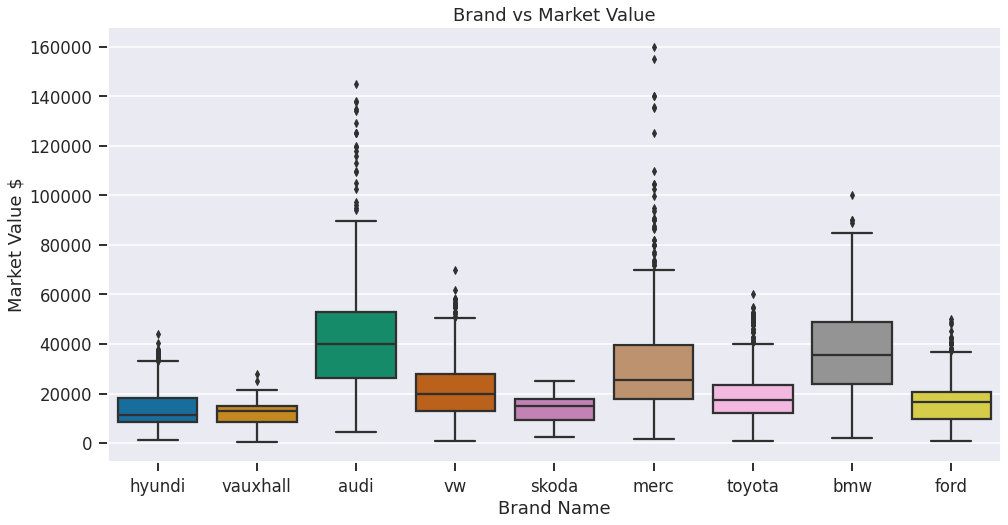

In [11]:
fig = plt.figure(figsize=(16,8))
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
ax=sns.boxplot(y='price', x='brand',data=df,palette="colorblind")
ax.set(xlabel='Brand Name', ylabel='Market Value $',title='Brand vs Market Value')

In [12]:
df.groupby(by=['brand']).mean()

,index,year,mileage,tax,mpg,engineSize,price
brand,,,,,,,
audi,2005.319312,2017.175908,21455.021033,192.294455,38.037094,3.144742,43055.277247
bmw,2085.852761,2017.297546,19342.323108,171.451943,59.539162,2.747955,38015.820041
ford,2081.257525,2016.430602,26445.050167,119.991639,51.501505,1.737625,15933.644649
hyundi,2033.679315,2016.314565,29497.436965,154.326805,46.455080,1.896695,14763.489596
merc,2128.024610,2016.246924,27268.958162,181.763741,45.823708,2.559557,30236.407711
skoda,2080.645768,2017.528213,18095.373041,128.471787,52.202508,1.294044,13908.515674
toyota,2035.970711,2016.297071,30520.092050,133.082287,60.342120,1.990656,18778.782427
vauxhall,2230.581818,2016.690909,22947.462338,156.415584,48.366753,1.519740,11978.981818
vw,2059.750647,2017.012942,24324.743745,145.008628,46.719154,2.005004,21862.010354


In [13]:
df.groupby(by=['brand']).mean().sort_values(['price'],ascending=False)

,index,year,mileage,tax,mpg,engineSize,price
brand,,,,,,,
audi,2005.319312,2017.175908,21455.021033,192.294455,38.037094,3.144742,43055.277247
bmw,2085.852761,2017.297546,19342.323108,171.451943,59.539162,2.747955,38015.820041
merc,2128.024610,2016.246924,27268.958162,181.763741,45.823708,2.559557,30236.407711
vw,2059.750647,2017.012942,24324.743745,145.008628,46.719154,2.005004,21862.010354
toyota,2035.970711,2016.297071,30520.092050,133.082287,60.342120,1.990656,18778.782427
ford,2081.257525,2016.430602,26445.050167,119.991639,51.501505,1.737625,15933.644649
hyundi,2033.679315,2016.314565,29497.436965,154.326805,46.455080,1.896695,14763.489596
skoda,2080.645768,2017.528213,18095.373041,128.471787,52.202508,1.294044,13908.515674
vauxhall,2230.581818,2016.690909,22947.462338,156.415584,48.366753,1.519740,11978.981818


In [14]:
# Ordinal Numeric Variables since some brands have higher selling value

df.replace({'brand' : { 'audi' : 1, 'bmw' : 2, 'merc' : 3, 'vw': 4, 'toyota': 5, 'ford': 6, 'hyundi': 7, 'skoda': 8, 'vauxhall':9 }},inplace=True)

[Text(0.5, 0, 'transmission'),
 Text(0, 0.5, 'Market Value $'),
 Text(0.5, 1.0, 'Transmission vs Market Value')]

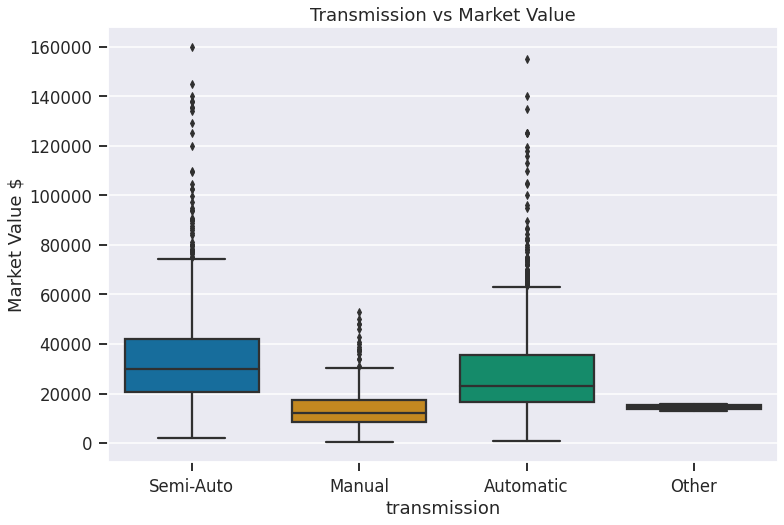

In [15]:
fig = plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
ax=sns.boxplot(y='price', x='transmission',data=df,palette="colorblind")
ax.set(xlabel='transmission', ylabel='Market Value $',title='Transmission vs Market Value')

In [16]:
df['transmission'].value_counts()
df=df[df.transmission!='Other']

[Text(0.5, 0, 'Fuel Type'),
 Text(0, 0.5, 'Market Value $'),
 Text(0.5, 1.0, 'Fuel Type vs Market Value')]

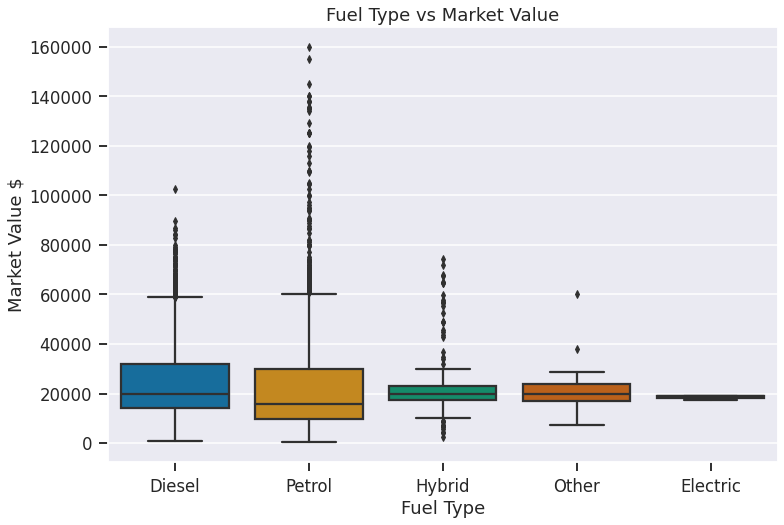

In [17]:
fig = plt.figure(figsize=(12,8))
plt.style.use('seaborn')
plt.tight_layout()
sns.set_context('talk')
ax=sns.boxplot(y='price', x='fuelType',data=df,palette="colorblind")
ax.set(xlabel='Fuel Type', ylabel='Market Value $',title='Fuel Type vs Market Value')

In [18]:
df['fuelType'].value_counts()
df=df[df.fuelType!='Electric']

<Figure size 576x396 with 0 Axes>

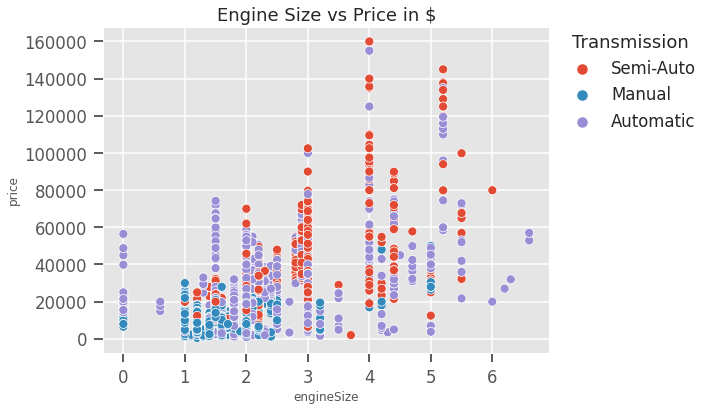

In [19]:
plt.tight_layout()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_context('talk')
plt.title('Engine Size vs Price in $')
sns.scatterplot( x="engineSize",y='price', hue="transmission",data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Transmission')

<AxesSubplot:title={'center':'MPG vs Price in $'}, xlabel='mpg', ylabel='price'>

<Figure size 576x396 with 0 Axes>

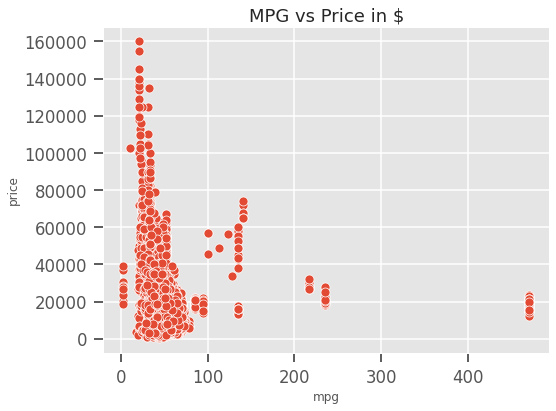

In [20]:
plt.tight_layout()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_context('talk')
plt.title('MPG vs Price in $')
sns.scatterplot( x="mpg",y='price',data=df)


<AxesSubplot:title={'center':'Year vs Price in $'}, xlabel='year', ylabel='price'>

<Figure size 576x396 with 0 Axes>

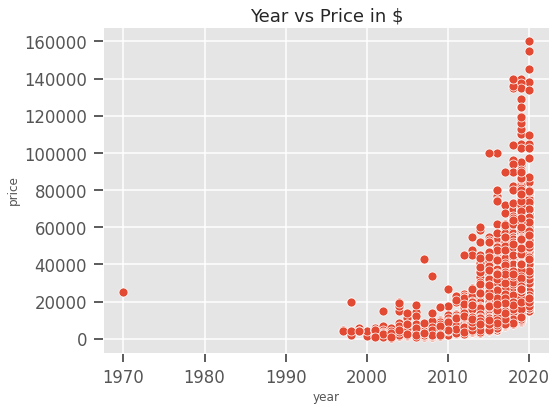

In [21]:
plt.tight_layout()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_context('talk')
plt.title('Year vs Price in $')
sns.scatterplot( x="year",y='price',data=df)


<Figure size 576x396 with 0 Axes>

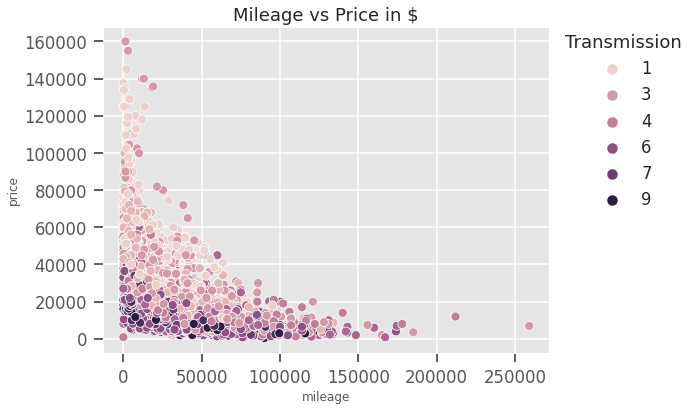

In [22]:
plt.tight_layout()
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 6))
sns.set_context('talk')
plt.title('Mileage vs Price in $')
sns.scatterplot( x="mileage",y='price', hue="brand",data=df)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Transmission')

In [23]:
def outliers(df_column):
  q75, q25 = np.percentile(df_column, [75 ,25]) 
  iqr = q75 - q25
  print('q75: ',q75)
  print('q25: ',q25)
  print('Inter Quartile Range: ',round(iqr,2))
  print('Outliers lie before', q25-1.8*iqr, 'and beyond', q75+1.8*iqr) 

  # Usually 1.5 times IQR is considered, but we have used 1.8 for broader range since datapoints are very less

  print('Number of Rows with Left Extreme Outliers:', len(df[df_column <q25-1.8*iqr]))
  print('Number of Rows with Right Extreme Outliers:', len(df[df_column>q75+1.8*iqr]))
  plt.tight_layout()
  plt.style.use('seaborn')
  sns.set_context('notebook')
  sns.histplot(data=df, x=df_column,multiple="stack")
  print('')

q75:  54.3
q25:  38.2
Inter Quartile Range:  16.1
Outliers lie before 9.220000000000013 and beyond 83.27999999999999
Number of Rows with Left Extreme Outliers: 10
Number of Rows with Right Extreme Outliers: 206



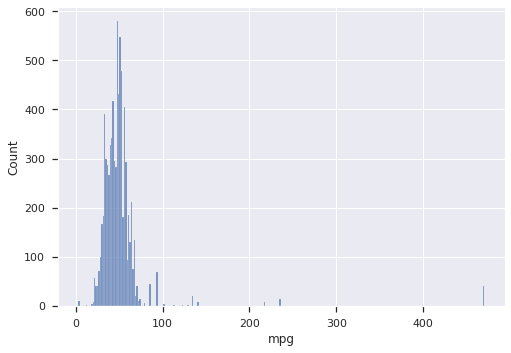

In [24]:
outliers(df['mpg'])

In [25]:
df=df[df.mpg<300]

q75:  157.5
q25:  145.0
Inter Quartile Range:  12.5
Outliers lie before 122.5 and beyond 180.0
Number of Rows with Left Extreme Outliers: 1013
Number of Rows with Right Extreme Outliers: 1511



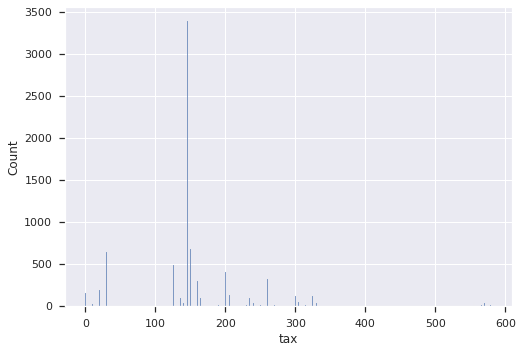

In [26]:
outliers(df['tax'])

q75:  2.8
q25:  1.6
Inter Quartile Range:  1.2
Outliers lie before -0.5599999999999996 and beyond 4.959999999999999
Number of Rows with Left Extreme Outliers: 0
Number of Rows with Right Extreme Outliers: 89



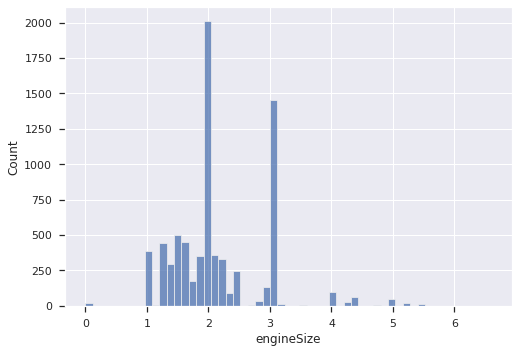

In [27]:
outliers(df['engineSize'])

In [28]:
def OHE(dfcolumn):
  global df
  dfcolumn.nunique()
  len(df.columns)
  finallencol = (dfcolumn.nunique() - 1) + (len(df.columns)-1)
  dummies = pd.get_dummies(dfcolumn, drop_first=True, prefix=dfcolumn.name)
  df=pd.concat([df,dummies],axis='columns')
  df.drop(columns=dfcolumn.name,axis=1,inplace=True) # We have to drop columns to aviod multi-collinearity
  if(finallencol==len(df.columns)):
    print('One Hot Encoding was successful!') 
    print('')
  else:
    print('Error in OHE XXXX')
  return df

In [29]:
OHE(df['transmission'])
OHE(df['fuelType'])


One Hot Encoding was successful!

One Hot Encoding was successful!



,index,brand,model,year,mileage,tax,mpg,engineSize,price,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,0,7,Santa Fe,2019,4223,145.0,39.8,2.2,31995,0,1,0,0,0
1,1,9,GTC,2015,47870,125.0,60.1,2.0,7700,1,0,0,0,0
2,2,1,RS4,2019,5151,145.0,29.1,2.9,58990,0,0,0,0,1
3,3,4,Scirocco,2016,20423,30.0,57.6,2.0,12999,0,0,0,0,0
4,4,8,Scala,2020,3569,145.0,47.1,1.0,16990,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7627,2667,1,A7,2015,21100,325.0,29.7,4.0,28990,0,1,0,0,1
7628,2668,3,CLS Class,2015,60972,160.0,52.3,3.0,17450,0,0,0,0,0
7629,2669,6,Puma,2020,4111,145.0,50.4,1.0,21995,1,0,0,0,1
7630,2670,3,CLA Class,2016,25726,200.0,41.5,2.0,18700,0,0,0,0,1


In [30]:
df.drop(['index'],axis=1,inplace=True)
df

,brand,model,year,mileage,tax,mpg,engineSize,price,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,7,Santa Fe,2019,4223,145.0,39.8,2.2,31995,0,1,0,0,0
1,9,GTC,2015,47870,125.0,60.1,2.0,7700,1,0,0,0,0
2,1,RS4,2019,5151,145.0,29.1,2.9,58990,0,0,0,0,1
3,4,Scirocco,2016,20423,30.0,57.6,2.0,12999,0,0,0,0,0
4,8,Scala,2020,3569,145.0,47.1,1.0,16990,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7627,1,A7,2015,21100,325.0,29.7,4.0,28990,0,1,0,0,1
7628,3,CLS Class,2015,60972,160.0,52.3,3.0,17450,0,0,0,0,0
7629,6,Puma,2020,4111,145.0,50.4,1.0,21995,1,0,0,0,1
7630,3,CLA Class,2016,25726,200.0,41.5,2.0,18700,0,0,0,0,1


In [31]:
vif = df.copy()
vif.drop(['model', 'price'], axis=1,inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = vif.columns
vif_data["VIF"] = [variance_inflation_factor(vif.values, i)
                          for i in range(len(vif.columns))]

In [32]:
vif_data

,feature,VIF
0,brand,10.470597
1,year,76.701305
2,mileage,2.389792
3,tax,7.189007
4,mpg,21.461687
5,engineSize,20.641991
6,transmission_Manual,3.367770
7,transmission_Semi-Auto,1.993368
8,fuelType_Hybrid,1.705811
9,fuelType_Other,1.061727


In [33]:
vif = df.copy()
vif.drop(['model','price','year'], axis=1,inplace=True)
vif_data = pd.DataFrame()
vif_data["feature"] = vif.columns
vif_data["VIF"] = [variance_inflation_factor(vif.values, i)
                          for i in range(len(vif.columns))]

In [34]:
vif_data

,feature,VIF
0,brand,7.339481
1,mileage,2.389786
2,tax,6.857465
3,mpg,11.110189
4,engineSize,9.500018
5,transmission_Manual,3.351031
6,transmission_Semi-Auto,1.950776
7,fuelType_Hybrid,1.600980
8,fuelType_Other,1.053174
9,fuelType_Petrol,1.680728


In [35]:
# Scale Data For Higher Efficiency
from sklearn.preprocessing import StandardScaler # Converts Columnar Data into Standard Normal Distribution
scaler=StandardScaler()
scaler.fit(vif)
scaled_data=scaler.transform(vif)
scaled_data

array([[ 1.01685472, -0.85667663, -0.10198623, ..., -0.1861127 ,
        -0.06194347, -0.73349119],
       [ 1.90438728,  0.96006799, -0.34747147, ..., -0.1861127 ,
        -0.06194347, -0.73349119],
       [-1.64574295, -0.81804995, -0.10198623, ..., -0.1861127 ,
        -0.06194347,  1.36334289],
       ...,
       [ 0.57308844, -0.86133848, -0.10198623, ..., -0.1861127 ,
        -0.06194347,  1.36334289],
       [-0.7582104 ,  0.03835532,  0.5730982 , ..., -0.1861127 ,
        -0.06194347,  1.36334289],
       [ 1.90438728,  3.10909369,  5.05320393, ..., -0.1861127 ,
        -0.06194347, -0.73349119]])

In [36]:
from sklearn.decomposition import PCA # Reduce Dimensions by Principal Component Analysis To Compensate for Variables with High VIF
pca=PCA(n_components=5)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca

array([[ 7.36333413e-01,  2.52231954e-01, -1.35476755e+00,
         7.61284663e-02, -9.78153050e-01],
       [-2.08836603e+00, -3.90307861e-01,  9.91906064e-01,
         4.38449090e-02, -8.09101172e-01],
       [ 1.80821851e+00, -4.71296489e-01, -5.07982401e-01,
        -1.15408809e-01,  1.08566257e+00],
       ...,
       [-1.68963650e+00, -1.41886139e+00, -1.00641255e+00,
        -6.99611898e-02,  7.07193262e-01],
       [ 7.26103193e-01, -6.60214818e-01,  2.23232490e-03,
        -7.60923620e-02,  1.27429386e+00],
       [ 1.08061280e+00, -1.90935756e+00,  4.11961460e+00,
         1.94463759e-01,  9.54964238e-01]])

In [37]:
print(x_pca.shape)
print(df['price'].shape)


(7587, 5)
(7587,)


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['price'], test_size=0.2, random_state=42)
reg = LinearRegression()
reg.fit(x_train, y_train)
print('Test Accuracy of Linear Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of Linear Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of Linear Regression:  56.17 %

Train Accuracy of Linear Regression: 54.86 %

Mean Squared Error (MSE):  10689.2329


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['price'], test_size=0.2, random_state=42)
reg=Ridge(alpha=0.01)
reg.fit(x_train, y_train)
print('Test Accuracy of Ridge Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of Ridge Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of Ridge Regression:  56.17 %

Train Accuracy of Ridge Regression: 54.86 %

Mean Squared Error (MSE):  10689.2329


In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['price'], test_size=0.2, random_state=42)
reg = RandomForestRegressor(random_state=123)
reg.fit(x_train, y_train)
print('Test Accuracy of Random Forest Regressor Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of Random Forest Regressor Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of Random Forest Regressor Regression:  90.53 %

Train Accuracy of Random Forest Regressor Regression: 98.5 %

Mean Squared Error (MSE):  4967.9878


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['price'], test_size=0.2, random_state=42)
reg=ElasticNet(alpha=0.005)
reg.fit(x_train, y_train)
print('Test Accuracy of ElacticNet Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of ElacticNet Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of ElacticNet Regression:  56.17 %

Train Accuracy of ElacticNet Regression: 54.86 %

Mean Squared Error (MSE):  10689.2856


In [42]:
from sklearn.tree import DecisionTreeRegressor
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['price'], test_size=0.2, random_state=4)
reg=DecisionTreeRegressor()
reg.fit(x_train, y_train)
print('Test Accuracy of DecisionTree Regression: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of DecisionTree Regression:',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of DecisionTree Regression:  88.33 %

Train Accuracy of DecisionTree Regression: 99.97 %

Mean Squared Error (MSE):  5975.2739


In [43]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 103, stop = 300, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [44]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.1s


[CV] n_estimators=124, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=124, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   1.6s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   3.0s
[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=30, bootstrap=False, total=  10.1s
[CV] n_estimators=168, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False 
[CV]  n_estimators=168, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=30, bootstrap=False, total=   2.7s
[CV] n_estimators=146, min_sampl

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.8min



[CV] n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True 
[CV]  n_estimators=300, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=90, bootstrap=True, total=   6.9s
[CV] n_estimators=212, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False 
[CV]  n_estimators=212, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=70, bootstrap=False, total=   3.7s
[CV] n_estimators=146, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False 
[CV]  n_estimators=146, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=False, total=   2.6s
[CV] n_estimators=278, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False 
[CV]  n_estimators=278, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=20, bootstrap=False, total=  11.7s
[CV] n_estimators=190, min_

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.3min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [103, 124, 146, 168,
                                                         190, 212, 234, 256,
                                                         278, 300]},
                   random_state=42, verbose=2)

In [45]:
rf_random.best_params_

{'n_estimators': 146,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, df['price'], test_size=0.2, random_state=4)
reg=RandomForestRegressor(n_estimators=168, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt',max_depth= 100, bootstrap= False)
reg.fit(x_train, y_train)
print('Test Accuracy of RandomForestRegressor: ',round(100*reg.score(x_test, y_test),2),'%')
print('')
print('Train Accuracy of RandomForestRegressor :',round(100*reg.score(x_train, y_train),2),'%')
print('')
y_pred=reg.predict(x_test)
print('Mean Squared Error (MSE): ',round(np.sqrt(mean_squared_error(y_test,y_pred)),4))

Test Accuracy of RandomForestRegressor:  92.43 %

Train Accuracy of RandomForestRegressor : 99.48 %

Mean Squared Error (MSE):  4812.291
